**Step 1: Setup and Imports**

In [1]:
#Step 1: Setup and Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


**Step 2: Loading and Exploring the Data**

In [2]:
#Step 2: Loading and Exploring the Data
from google.colab import files
#uploaded = files.upload()

#Loading the datasets
train_data = pd.read_csv('covid.train.csv')
test_data = pd.read_csv('covid.test.csv')

#Displaying the first few rows of the datasets
print(train_data.head())
print(train_data.describe())
print(train_data.info())


   id   AL   AK   AZ   AR   CA   CO   CT   FL   GA  ...  restaurant.2  \
0   0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     23.812411   
1   1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     23.682974   
2   2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     23.593983   
3   3  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     22.576992   
4   4  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     22.091433   

   spent_time.2  large_event.2  public_transit.2  anxious.2  depressed.2  \
0     43.430423      16.151527          1.602635  15.409449    12.088688   
1     43.196313      16.123386          1.641863  15.230063    11.809047   
2     43.362200      16.159971          1.677523  15.717207    12.355918   
3     42.954574      15.544373          1.578030  15.295650    12.218123   
4     43.290957      15.214655          1.641667  14.778802    12.417256   

   felt_isolated.2  worried_become_ill.2  worried_finances.2  \
0        16.702086             53.991549

**Step 3: Exploratory Data Analysis (EDA)**

id                      0
AL                      0
AK                      0
AZ                      0
AR                      0
                       ..
depressed.2             0
felt_isolated.2         0
worried_become_ill.2    0
worried_finances.2      0
tested_positive.2       0
Length: 95, dtype: int64


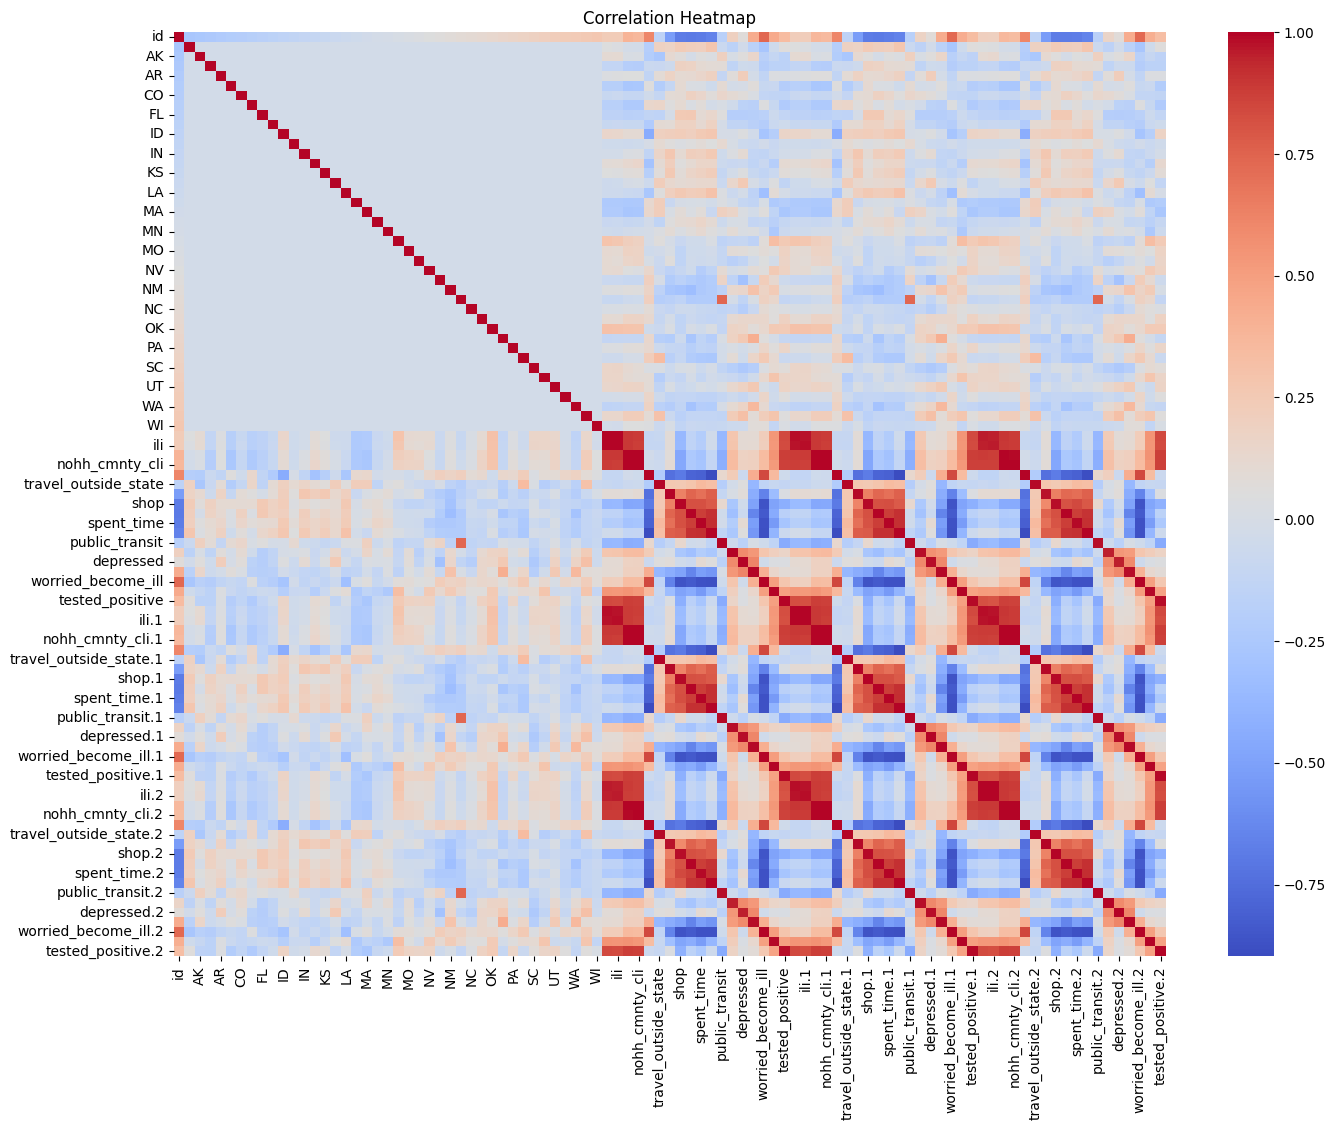

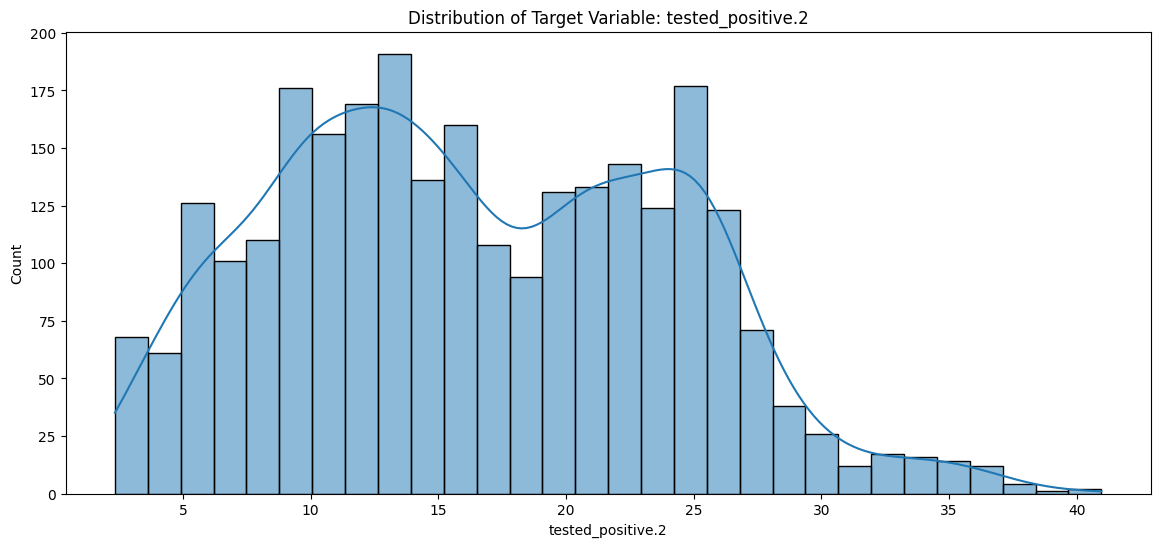

In [3]:
#Step 3: Exploratory Data Analysis (EDA)
#Checking for missing values
print(train_data.isnull().sum())

#Correlation heatmap
plt.figure(figsize=(16,12))
sns.heatmap(train_data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#Visualizing some key features
plt.figure(figsize=(14,6))
sns.histplot(train_data['tested_positive.2'], bins=30, kde=True)
plt.title('Distribution of Target Variable: tested_positive.2')
plt.show()


**Step 4: Data Preprocessing**

In [4]:
#Step 4: Data Preprocessing
#To drop 'id' column and separate target variable
X = train_data.drop(columns=['id', 'tested_positive.2'])
y = train_data['tested_positive.2']

#Normalizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Converting to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

#Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

#Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=64)


**Step 5: Model Building**

In [5]:
#Step 5: Model Building
class DNN(nn.Module):
    def __init__(self, input_size):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

#Instantiate the model
input_size = X_train.shape[1]
model = DNN(input_size)
print(model)


DNN(
  (fc1): Linear(in_features=93, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.3, inplace=False)
)


**Step 6: Model Training**

Epoch 1/100, Train Loss: 248.4491, Validation Loss: 70.9891
Epoch 2/100, Train Loss: 32.2338, Validation Loss: 11.3059
Epoch 3/100, Train Loss: 14.7562, Validation Loss: 6.6277
Epoch 4/100, Train Loss: 11.2361, Validation Loss: 5.5139
Epoch 5/100, Train Loss: 9.8091, Validation Loss: 4.5396
Epoch 6/100, Train Loss: 8.5375, Validation Loss: 3.8382
Epoch 7/100, Train Loss: 8.2793, Validation Loss: 3.3121
Epoch 8/100, Train Loss: 8.0211, Validation Loss: 2.8966
Epoch 9/100, Train Loss: 7.1163, Validation Loss: 3.2734
Epoch 10/100, Train Loss: 7.4722, Validation Loss: 2.4307
Epoch 11/100, Train Loss: 6.5222, Validation Loss: 2.5383
Epoch 12/100, Train Loss: 6.4735, Validation Loss: 2.0620
Epoch 13/100, Train Loss: 6.7947, Validation Loss: 2.1128
Epoch 14/100, Train Loss: 6.8427, Validation Loss: 2.3589
Epoch 15/100, Train Loss: 5.9363, Validation Loss: 1.9478
Epoch 16/100, Train Loss: 5.9838, Validation Loss: 2.1815
Epoch 17/100, Train Loss: 6.5823, Validation Loss: 1.8840
Epoch 18/100, Tr

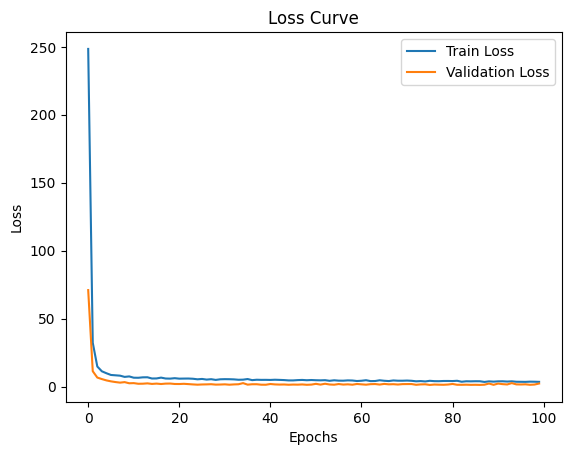

In [6]:
#Step 6: Model Training
#Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

#Training loop
epochs = 100
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    val_loss = 0
    model.eval()
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            val_loss += loss.item()

    train_losses.append(train_loss/len(train_loader))
    val_losses.append(val_loss/len(val_loader))

    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}')

#Plotting the loss curve
plt.plot(range(epochs), train_losses, label='Train Loss')
plt.plot(range(epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()


**Root Mean Square Error (RMSE)**

In [7]:
import torch

#RMSE Calculation Function
def calculate_rmse(y_true, y_pred):
    mse = torch.mean((y_true - y_pred) ** 2)
    rmse = torch.sqrt(mse)
    return rmse

#Example usage in the evaluation phase
model.eval()
with torch.no_grad():
    predictions = model(X_val).view(-1)
    rmse = calculate_rmse(y_val.view(-1), predictions)

print(f'Validation RMSE: {rmse.item():.4f}')


Validation RMSE: 1.4680


**Step 7: Model Evaluation**

In [8]:
#Step 7: Model Evaluation
#Preparing the test data
X_test = test_data.drop(columns=['id'])
X_test = scaler.transform(X_test)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

#To Generate predictions
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).numpy()

#Output the prediction
test_data['Predicted_tested_positive'] = predictions
print(test_data[['id', 'Predicted_tested_positive']].head())


   id  Predicted_tested_positive
0   0                  18.411449
1   1                   5.615235
2   2                   6.824465
3   3                  10.934838
4   4                   4.511392


**Step 8: Save the Model and Predictions**

In [9]:
#Step 8: Save the Model and Predictions
torch.save(model.state_dict(), 'dnn_covid_model.pth')
test_data[['id', 'Predicted_tested_positive']].to_csv('covid_predictions.csv', index=False)
